In [2]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
styl = readall(file) # Read the file
HTML("$styl") # Output as HTML

UndefVarError: UndefVarError: readall not defined

<h1> Plotting data and an approximately fitted line simultaneously </h1>

<h2>In this lecture</h2>

- [Outcome](#Outcome)
- [Julia's modify-the-argument functions/改变参数函数](#Julia's-modify-the-argument-functions)
- [The difference between plot() and plot!()](#The-difference-between-"plot"-and-"plot!")
- [An example: approximating the cosine function](#An-example:-approximating-the-cosine-function)

[Back to the top](#In-this-lecture)

<h2>Outcome</h2>

After this lecture, you will be able to
- Explain how Julia's plot!() function differs from plot()
- 解释plot!()与plot()的不同
- Use plot!() to overlay a fitted curve to a scatter of data
- 使用plot!()覆盖一个拟合的曲线使其变成点图
- Modify the plot: adding labels, axis styles, line styles etc


[Back to the top](#In-this-lecture)

<h2>Julia's modify-the-argument functions</h2>

A lovely feature of Julia is the convention of labelling modify-the-argument functions with an exclamation mark.

For example, consider the function fill!(), illustrated below.

In [9]:
tempvar = Array{Any}(undef, 4)
fill!(tempvar, "hello ... word")

4-element Array{Any,1}:
 "hello ... word"
 "hello ... word"
 "hello ... word"
 "hello ... word"

In [10]:
fill!(tempvar, 777)

4-element Array{Any,1}:
 777
 777
 777
 777

Let's just look at how the help system briefly, comparing these two functions and also looking at all functions starting with "a" and with "b" to see how many of the modify-in-place functions Julia has.

In [11]:
?b

search: big bar bind blue bbox barh bar! BGR break begin Bool bswap brush barh!

Couldn't find b
Perhaps you meant !, %, &, *, +, -, /, :, <, >, \, ^, |, ~, ÷, π, ℯ, ∈, ∉, ∋ or ∌


No documentation found.

Binding `b` does not exist.


We see that quite a few functions have a plain form and an exclamation form. And many of the exclamation-ending-modify-in-place functions do things like add or remove values. They tend to be low level functions. The advantage of course is that as values are created they are written to space in memory that is already in use. This can speed up one's code significantly, and can also be important when your data sets are so large that memory efficiency becomes an issue.

[Back to the top](#In-this-lecture)

<h2>The difference between "plot" and "plot!"</h2>

As we remarked, Plots is a package for using all the Julia plotting packages. The designer of Plots made the interesting choice (I think) to have only one active plot: if you want to make a different plot, you save your current plot and start on a new one. This simplifies the display of a plot. In our case, the notebook allows us to view different plots, because each plot is saved with its particular cell. In keeping with the idea of Plots, you cannot associate more than one plot with a cell.

So in general, if you call plot() a second time, it wipes out the old plot and draws a completely new one. But Plots *also* doesn't allow you to specify multiple different x-values for your plot. You can plot many different curves, as we did for the different countries' Ebola numbers (week 2, lecture 5), but only if they all use the same x-values.

To enable us to plot completely different curves, not only in style and colour and so on but also completely different x- and y-values, Plots gives us a function that modifies an existing plot. This function is plot!().

So the idea is the following: specify a plot for the first set of data using "plot()", and then specify, on the same plot, a second set of data by using "plot!"

[Back to the top](#In-this-lecture)

<h2>An example: approximating the cosine function</h2>

An example will make this clear. It is well known that the cosine function has approximations based on  Taylor series. We will use the fact that 

$cos(x) \approx 1 - \dfrac{x^2}{2} + \dfrac{x^4}{24} - \dfrac{x^6}{720}$

is an excellent approximation as long as $x$ is near zero. We will pretend the approximate values are experimental data, so there are just a few points. Then we compare the actual function as a curve, and compare them.

While we're at it, let's practice writing functions. We will write a function that takes a whole vector as input, and one by one evaluates the elements using the approximation formula, and then returns an output vector of the same size as the input.

In [25]:
function approxcos(x)
    #initialise the output ... note the use of size() to specify the dimensions of the output vector
    outval = Array{Any}(undef, size(x))  
    
    # now we loop over the input vector, and for each  element calculate and store the approximation
    ii = 0  # this will be the index into the vector
    for aa in x   # this aa is just a number, an element of the vector
        y = 1 - aa^2/2 + aa^4/24 - aa^6/720 + aa^8/(56*720) # the approximation ...
        ii = ii+1            #this sets the index correctly
        outval[ii] = y     # and this stores the approximation in the right place
    
    end
    
    return outval  
end




x1 = 6rand(10)  # rand() is one of several random number functions in Julia. It returns numbers that uniformly fill the interval [0, 1]
#                   .... here we use it get a set of sampling points in the interval [0, 4]

#x2 = range(0, stop=6, length =200)
#println(x2)
x2 = LinRange(0, 6, 200)   # look up linspace() using "?" ... it's a nice way to get evenly spaced points
#println(x2)
y2 = Array{Float64}(undef, 200)
for i = 1:200
    y2[i] = cos(x2[i])
end

y1 = approxcos(x1)
#y2 = cos(x2)


10-element Array{Any,1}:
 -0.09495535967226104
 -0.5844186833792309 
  0.8675232623386883 
  0.14184967859052433
 -0.9696714438673049 
  0.1621356617954538 
  0.8163905862835863 
  1.3628289886426677 
 -0.9429208996055628 
 -0.6332046872183053 

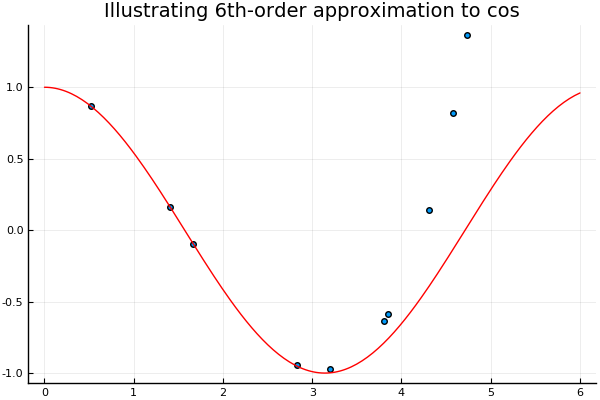

In [26]:
# now the plots
using Plots; pyplot()    # it is sometimes convenient to cram a line in this way

#first the plot of the approximation points
plot(x1, y1, line=:scatter, legend=:false, title="Illustrating 6th-order approximation to cos")

plot!(x2,y2; line = (:path, :red))   #then add the accurate line with plot!()

[Back to the top](#In-this-lecture)